<a href="https://colab.research.google.com/github/imPhacko/PublicProjects/blob/main/projektas_extra1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.DataFrame({'words': io.open('/content/drive/MyDrive/DATA AI/TRUMP.txt', 'r', encoding='ascii', errors='ignore').read().split('\n')})

In [ ]:
df.head()

,words
0,Donald Trump: (05:38)
1,"A friend of mine and a man of great courage, a..."
2,Donald Trump: (06:31)
3,Its a true honor to join you this evening. For...
4,Donald Trump: (07:34)


In [ ]:
df.loc[1, 'words']

'A friend of mine and a man of great courage, and just a really terrific person, especially when you see whats happening on our border, Tom Homan. Tom. Tom is just amazing. And likewise, Mark Morgan, right from the beginning hes been with us. Mark. Wheres Mark? Mark thank you. Thank you, Mark. Those two, great people and so many other incredible patriots in the room. Is that Sean? I think so. Yeah. Will you stand up? You know, now hes a movie star. That hair is so perfect. He did a hell of a job too and they appreciate now really a lot, and he danced very well too. We were putting in those Trump votes, we almost got you to the end, right? We almost got you to the end, but you did a great job. Thanks Sean, very much.'

In [ ]:
df['#characters'] = df.words.str.len()
df['#words'] = df.words.str.split().str.len()
#df['#lines'] = df.words.str.split('\n').str.len()
df['#uniq_words'] = df.words.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['#uniq_words'] / df['#words']

In [ ]:
df.head()

,words,#characters,#words,#lines,#uniq_words,lexical_density,sentiment_score,sentiment,topic
0,Donald Trump: (05:38),21,3,1,3,1.000000,0.0000,neutral,Topic 0
1,"A friend of mine and a man of great courage, a...",724,142,1,104,0.732394,0.9825,positive,Topic 4
2,Donald Trump: (06:31),21,3,1,3,1.000000,0.0000,neutral,Topic 0
3,Its a true honor to join you this evening. For...,806,137,1,93,0.678832,0.9883,positive,Topic 1
4,Donald Trump: (07:34),21,3,1,3,1.000000,0.0000,neutral,Topic 0


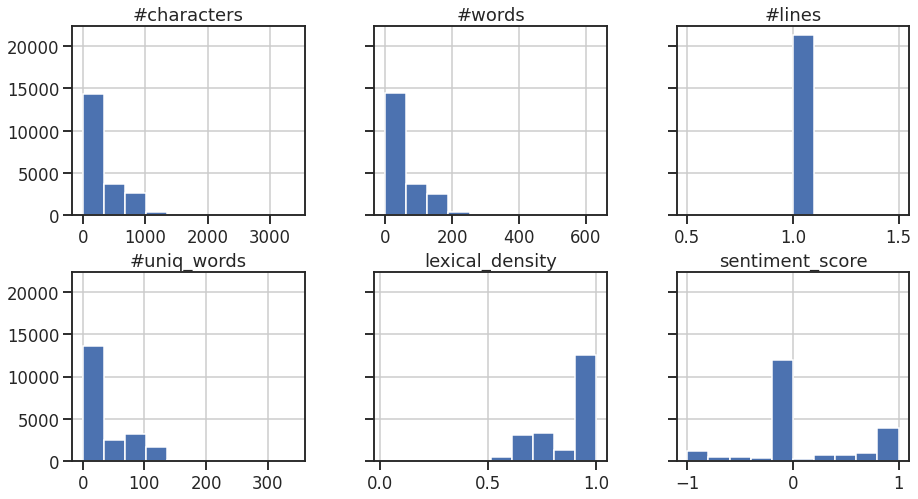

In [ ]:
df.hist(sharey=True, layout=(2, 3), figsize=(15, 8));

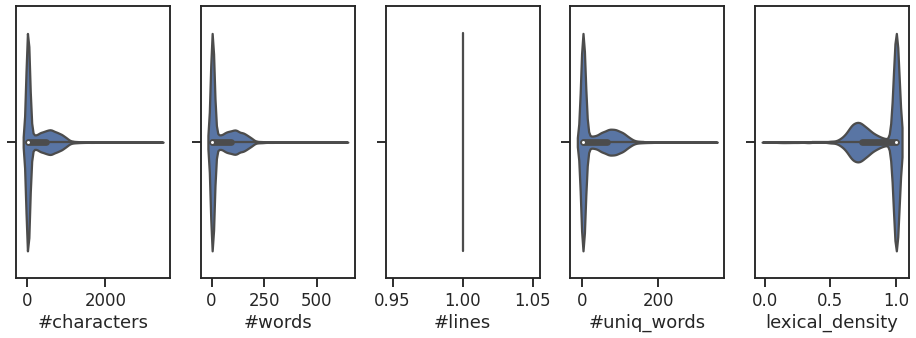

In [ ]:
cols_metrics = df.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(ncols=len(cols_metrics), figsize=(16, 5))
for i, c in enumerate(cols_metrics):
    sns.violinplot(x=df[c], ax=axs[i], sharex=True)

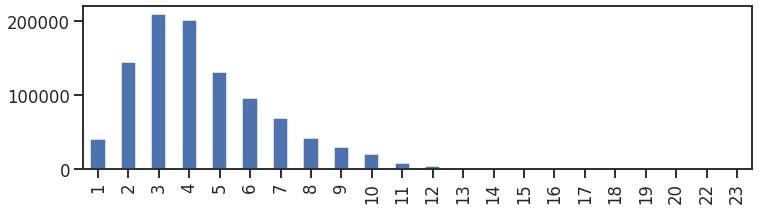

In [ ]:
pd.Series(len(x) for x in ' '.join(df.words).split()).value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

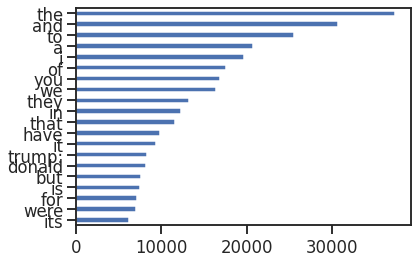

In [ ]:
pd.Series(' '.join(df.words).lower().split()).value_counts()[:20][::-1].plot(kind='barh')

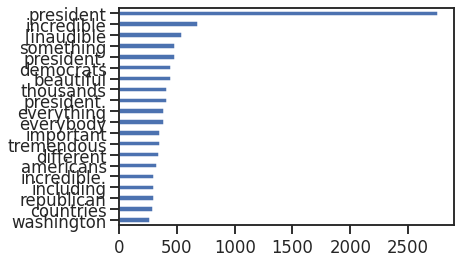

In [ ]:
pd.Series([w for w in ' '.join(df.words).lower().split() if len(w) > 8]).value_counts()[:20][::-1].plot(kind='barh')

In [ ]:
from nltk import ngrams

def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

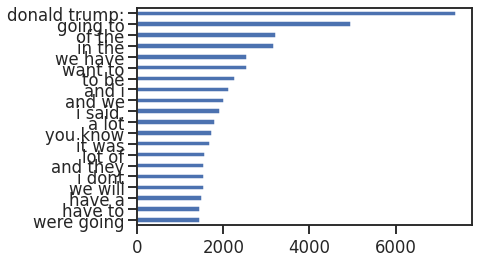

In [ ]:
pd.Series(get_ngrams_from_series(df.words, 2)).value_counts()[:20][::-1].plot(kind='barh')

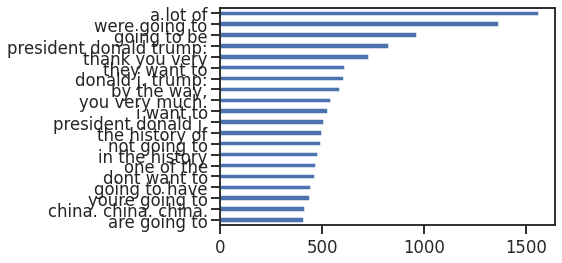

In [ ]:
pd.Series(get_ngrams_from_series(df.words, 3)).value_counts()[:20][::-1].plot(kind='barh')

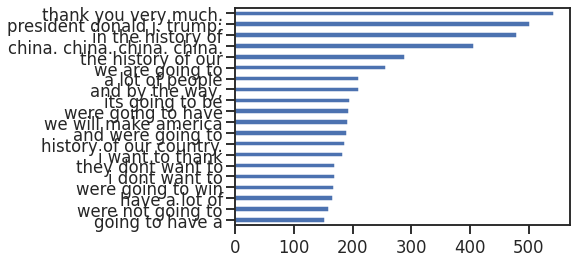

In [ ]:
pd.Series(get_ngrams_from_series(df.words, 4)).value_counts()[:20][::-1].plot(kind='barh')

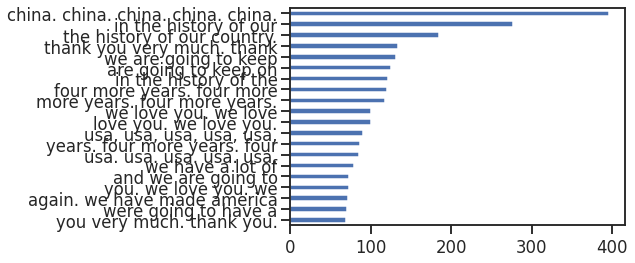

In [ ]:
pd.Series(get_ngrams_from_series(df.words, 5)).value_counts()[:20][::-1].plot(kind='barh')

In [ ]:
import nltk
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

In [ ]:
df['sentiment_score'] = pd.DataFrame(df.words.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_score'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

In [ ]:
df.head()

,words,#characters,#words,#lines,#uniq_words,lexical_density,sentiment_score,sentiment
0,Donald Trump: (05:38),21,3,1,3,1.000000,0.0000,neutral
1,"A friend of mine and a man of great courage, a...",724,142,1,104,0.732394,0.9825,positive
2,Donald Trump: (06:31),21,3,1,3,1.000000,0.0000,neutral
3,Its a true honor to join you this evening. For...,806,137,1,93,0.678832,0.9883,positive
4,Donald Trump: (07:34),21,3,1,3,1.000000,0.0000,neutral


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7bac0a250>]],
      dtype=object)

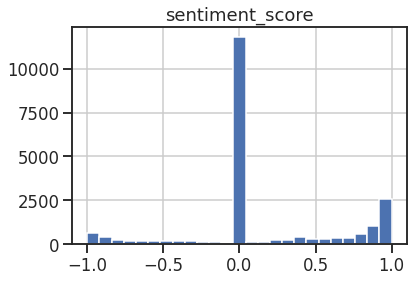

In [ ]:
df[['sentiment_score']].hist(bins=25)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

no_topics = 5
no_features = 50
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df.words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

def get_topics(model, feature_names, no_topwords):
    for topic_id, topic in enumerate(model.components_):
        print('topic %d:' % (topic_id))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_topwords-1:-1]]))

s = pd.DataFrame(nmf.transform(tfidf)).idxmax(1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
get_topics(nmf, tfidf_feature_names, 20)

topic 0:
donald trump 00 love 01 president job im hes great got good going dont doing just didnt did country come
topic 1:
going said people know dont right want thats like theyre great think say just got country years did hes good
topic 2:
01 00 donald trump joe biden job im hes great got good going dont didnt doing know did country come
topic 3:
president trump 00 im years american america country say said new time china did come just like weve got biden
topic 4:
thank great job america good love really 00 want make come doing just youre thats hes american time country right


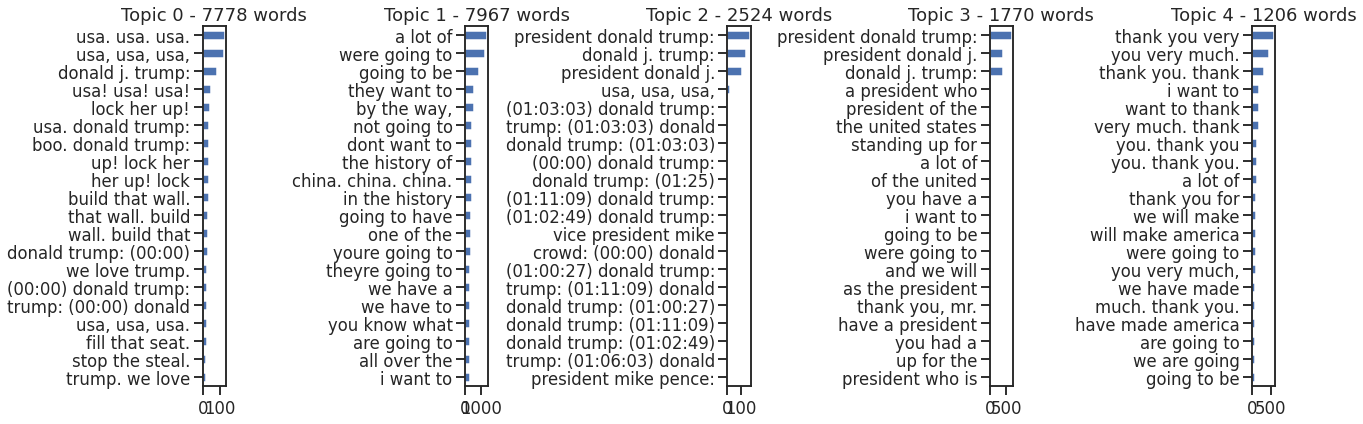

In [ ]:
topics = set(s)
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = df.loc[s.eq(v), 'words']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 3)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} words'.format(v, s.eq(v).sum()))
plt.tight_layout()
df['topic'] = s.astype(str).radd('Topic ')

In [ ]:
import re
import random
from collections import defaultdict


class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_speech(self, lines=10, length=8, length_range=None, startswith=None):
        speech = []
        if startswith:
            speech.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            speech.append(self.gen_sentence(length=sent_len))
        return '\n'.join(speech)

In [ ]:
trumpAI = MarkovRachaita(corpus=' '.join(df.words))
trumpAI.gen_speech(lines=10, length_range=[5, 10])

'many generations to build it because today is like three\ni said she interrupted me much donald trump but we\nbut heres the deal we paid for by\nthey call it not freedom it was a positive\nthey treat criminals like heroes they take away your borders\na political party to the folks at a tremendous story i\nissuing today will be the simplest donald trump\nby the time he said sir do\nthis corrupt political class has nothing to\nenforcement im very impressed by the way is to change'

In [ ]:
trumpAI.gen_speech(lines=10, length_range=[5, 10], startswith='ukraine')

'of ukraine russia showed just how dr fauci how do\ninto an office look we have reduced illegal\nvoice that scares people people right here in\ni may a couple of words would you please read it and\nin advance very much that i think\nabiding americans he called it because the radical socialist democrats are\nbecause i cant breathe this guy hes as mexican\nfraudulent numbers shouldnt take any kind of ice and border patrol great\nsaid you can do whatever the hell\ndepleted it was like a vacuum cleaner'